## 2024 March Madness Predictions

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def format_float(x):
    return '{:.2f}'.format(x)

# Set the display option to use the formatting function for floating-point numbers
pd.set_option('display.float_format', format_float)

import sys
sys.path.append('../models')

### Load Model

In [65]:
import joblib
rf = joblib.load('../models/rf.pkl')





### Load Data

In [66]:
df_2024 = pd.read_csv("data/2024_Scrubbed.csv")

### Create DF

In [67]:
X = df_2024.drop(columns=['TEAM'])

# Calculate probabilities using the Random Forest model
prob = [rf.predict_proba([row])[0] for index, row in X.iterrows()]
prob = [[round(p, 4) for p in row] for row in prob]
prob_df = pd.DataFrame(prob, columns=['R64', 'R32', 'S16', 'E8', 'F4', 'F2', 'Champ'], index=X.index)

# Merge the probabilities DataFrame with the ratings DataFrame
df_2024 = pd.concat([df_2024, prob_df], axis=1)

# Reorder the columns
df_2024 = df_2024[['TEAM', 'R64', 'R32', 'S16', 'E8', 'F4', 'F2', 'Champ']]

# Set the index to 'TEAM'
df_2024_pivot = df_2024.set_index('TEAM')

df_orig = df_2024_pivot.copy()

d:\MMPredictionsProject\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\MMPredictionsProject\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\MMPredictionsProject\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\MMPredictionsProject\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\MMPredictionsProject\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\MMPredictionsProject\venv\lib\site-pa

### Edit data frame to be probability to reach each round

In [68]:
for index, row in df_2024_pivot.iterrows():
    R32 = row['R32']
    S16 = row['S16']
    E8 = row['E8']
    F4 = row['F4']
    F2 = row['F2']
    df_2024_pivot.at[index, 'R32'] = 1 - row['R64']
    df_2024_pivot.at[index, 'S16'] = row['R32'] - R32
    df_2024_pivot.at[index, 'E8'] = row['S16'] - S16
    df_2024_pivot.at[index, 'F4'] = row['E8'] - E8
    df_2024_pivot.at[index, 'F2'] = row['F4'] - F4 

In [69]:
df_2024_pivot = df_2024_pivot.sort_values(by='R32', ascending=False)
del df_2024_pivot['R64']

### Create Tables

In [70]:
df_East = df_2024_pivot[df_2024_pivot.index.isin(['Connecticut', 'Iowa St.', 'Illinois', 'Auburn', 'San Diego St.', 'BYU', 'Washington St.', "Florida Atlantic", 
                                                      'Northwestern', 'Drake', 'Duquesne', 'UAB', 'Yale', 'Morehead St.', 'South Dakota St.', 'Stetson'])]

df_South = df_2024_pivot[df_2024_pivot.index.isin(['Houston', 'Marquette', 'Kentucky', 'Duke', 'Wisconsin', 'Texas Tech', 'Florida', "Nebraska", 
                                                      'Texas A&M', 'Coloradoa', 'Boise St.', 'North Carolina St.', 'James Madison', 'Vermont', 'Oakland', 'Western Kentucky', 'Longwood'])]

df_Midwest = df_2024_pivot[df_2024_pivot.index.isin(['Purdue', 'Tennessee', 'Creighton', 'Kansas', 'Gonzaga', 'South Carolina', 'Texas', 'Utah St.', 
                                                      'TCU', 'Colorado St.', 'Virginia', 'Oregon', 'McNeese St.', 'Samford', 'Akron', "Saint Peter's", 'Grambling St', 'Montana St.'])]

df_West = df_2024_pivot[df_2024_pivot.index.isin(['North Carolina', 'Arizona', 'Baylor', 'Alabama', "Saint Mary's", 'Clemson', "Dayton", 
                                                      'Mississippi St.', 'Michigan St.', 'Nevada', "New Mexico", 'Grand Canyon', 'College of Charleston', 'Colgate', 'Long Beach St.', 'Howard', 'Wagner'])]

In [79]:
df_2024_pivot.head(60)

,R32,S16,E8,F4,F2,Champ
TEAM,,,,,,
Connecticut,0.98,0.85,0.75,0.53,0.42,0.23
Tennessee,0.97,0.81,0.45,0.20,0.07,0.06
Houston,0.95,0.89,0.69,0.44,0.24,0.19
Auburn,0.94,0.72,0.62,0.26,0.16,0.09
Marquette,0.93,0.73,0.39,0.33,0.07,0.05
Duke,0.92,0.67,0.26,0.10,0.04,0.01
Arizona,0.92,0.79,0.61,0.34,0.25,0.14
Iowa St.,0.91,0.72,0.43,0.15,0.09,0.06
Purdue,0.90,0.75,0.62,0.48,0.36,0.20


In [71]:
df_East

,R32,S16,E8,F4,F2,Champ
TEAM,,,,,,
Connecticut,0.98,0.85,0.75,0.53,0.42,0.23
Auburn,0.94,0.72,0.62,0.26,0.16,0.09
Iowa St.,0.91,0.72,0.43,0.15,0.09,0.06
San Diego St.,0.81,0.30,0.14,0.04,0.01,0.00
Illinois,0.78,0.54,0.25,0.07,0.04,0.00
BYU,0.69,0.39,0.11,0.08,0.02,0.01
Northwestern,0.60,0.18,0.06,0.03,0.00,0.00
Washington St.,0.60,0.16,0.05,0.04,-0.00,0.00
Florida Atlantic,0.51,0.15,0.04,0.02,0.00,0.00


In [72]:
df_South

,R32,S16,E8,F4,F2,Champ
TEAM,,,,,,
Houston,0.95,0.89,0.69,0.44,0.24,0.19
Marquette,0.93,0.73,0.39,0.33,0.07,0.05
Duke,0.92,0.67,0.26,0.10,0.04,0.01
Texas Tech,0.88,0.22,0.07,0.02,0.01,0.00
Kentucky,0.80,0.47,0.16,0.05,0.03,0.00
Texas A&M,0.74,0.21,0.09,0.01,0.01,0.00
Wisconsin,0.74,0.44,0.17,0.13,-0.00,0.00
Florida,0.73,0.41,0.11,0.05,0.02,0.00
Nebraska,0.71,0.26,0.10,0.05,-0.00,0.00


In [73]:
df_Midwest

,R32,S16,E8,F4,F2,Champ
TEAM,,,,,,
Tennessee,0.97,0.81,0.45,0.20,0.07,0.06
Purdue,0.90,0.75,0.62,0.48,0.36,0.20
Kansas,0.79,0.41,0.15,0.05,0.05,0.00
Texas,0.79,0.21,0.07,0.04,0.01,0.00
Gonzaga,0.79,0.57,0.16,0.12,0.02,0.02
Creighton,0.78,0.63,0.31,0.19,0.07,0.01
TCU,0.64,0.17,0.08,0.01,0.00,0.00
Colorado St.,0.51,0.20,0.09,0.05,0.00,0.00
Utah St.,0.48,0.12,0.05,0.01,-0.00,0.00


In [74]:
df_West

,R32,S16,E8,F4,F2,Champ
TEAM,,,,,,
Arizona,0.92,0.79,0.61,0.34,0.25,0.14
Alabama,0.80,0.41,0.19,0.06,0.02,0.01
Michigan St.,0.79,0.19,0.10,0.04,0.03,0.01
Mississippi St.,0.77,0.30,0.08,0.03,0.01,0.01
Baylor,0.75,0.48,0.17,0.01,-0.00,0.00
North Carolina,0.73,0.53,0.25,0.11,0.08,0.01
New Mexico,0.65,0.21,0.10,0.04,0.01,0.00
Saint Mary's,0.64,0.09,0.03,0.03,-0.00,0.00
Clemson,0.59,0.24,0.08,0.05,0.02,0.00


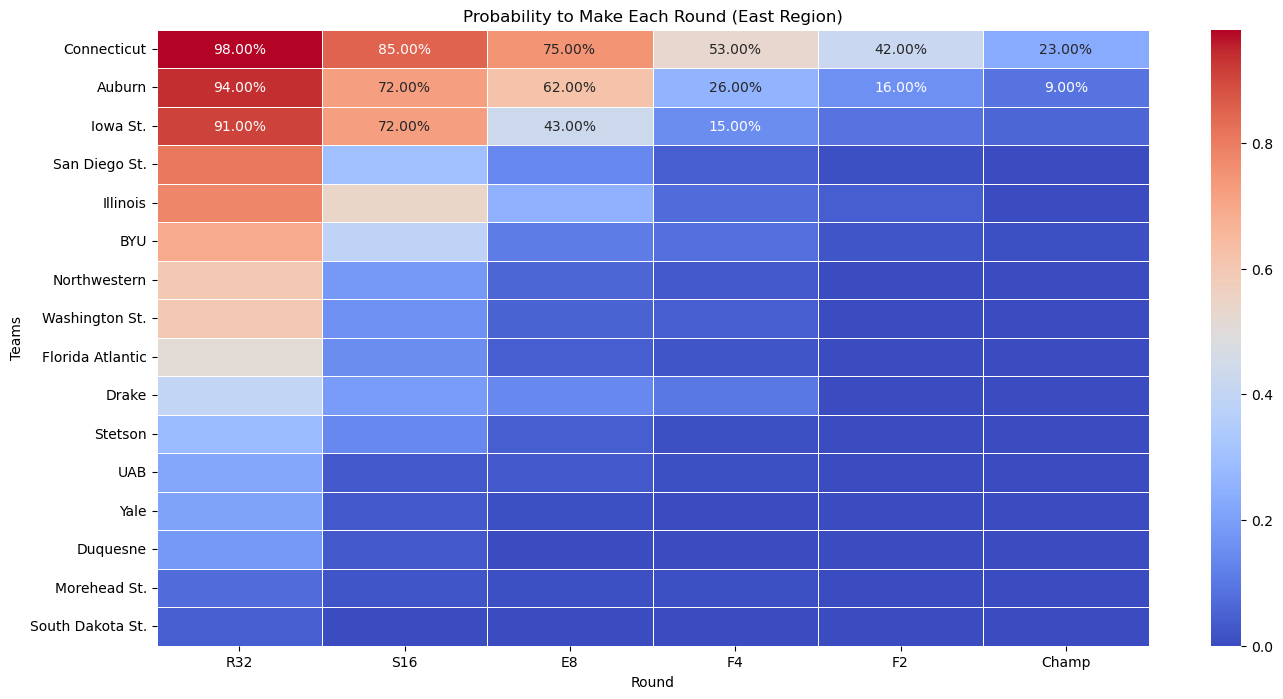

In [75]:
# Plotting heatmap
plt.subplots(figsize=(16, 8))
sns.heatmap(df_East, annot=True, cmap="coolwarm", fmt=".2%", linewidths=.5)  # Change cmap for different color palettes
plt.title('Probability to Make Each Round (East Region)')
plt.xlabel('Round')
plt.ylabel('Teams')
plt.show()

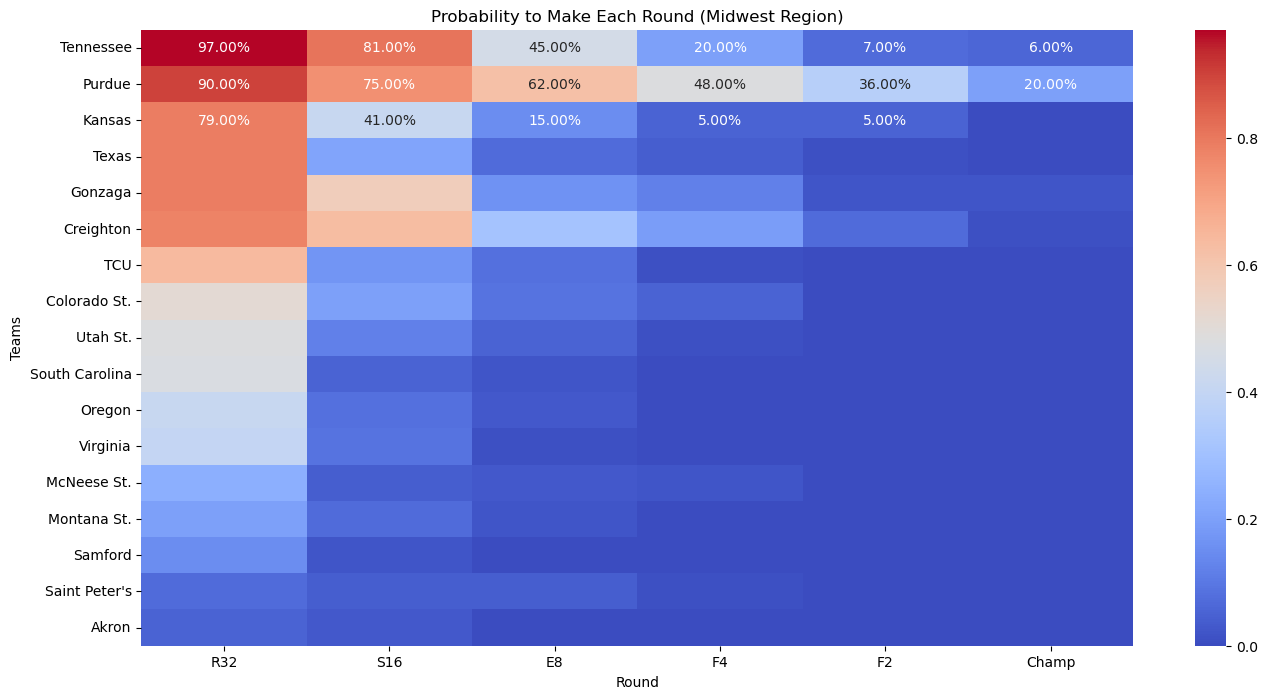

In [76]:
# Plotting heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(df_Midwest, annot=True, cmap="coolwarm", fmt=".2%")  # Change cmap for different color palettes
plt.title('Probability to Make Each Round (Midwest Region)')
plt.xlabel('Round')
plt.ylabel('Teams')
plt.show()

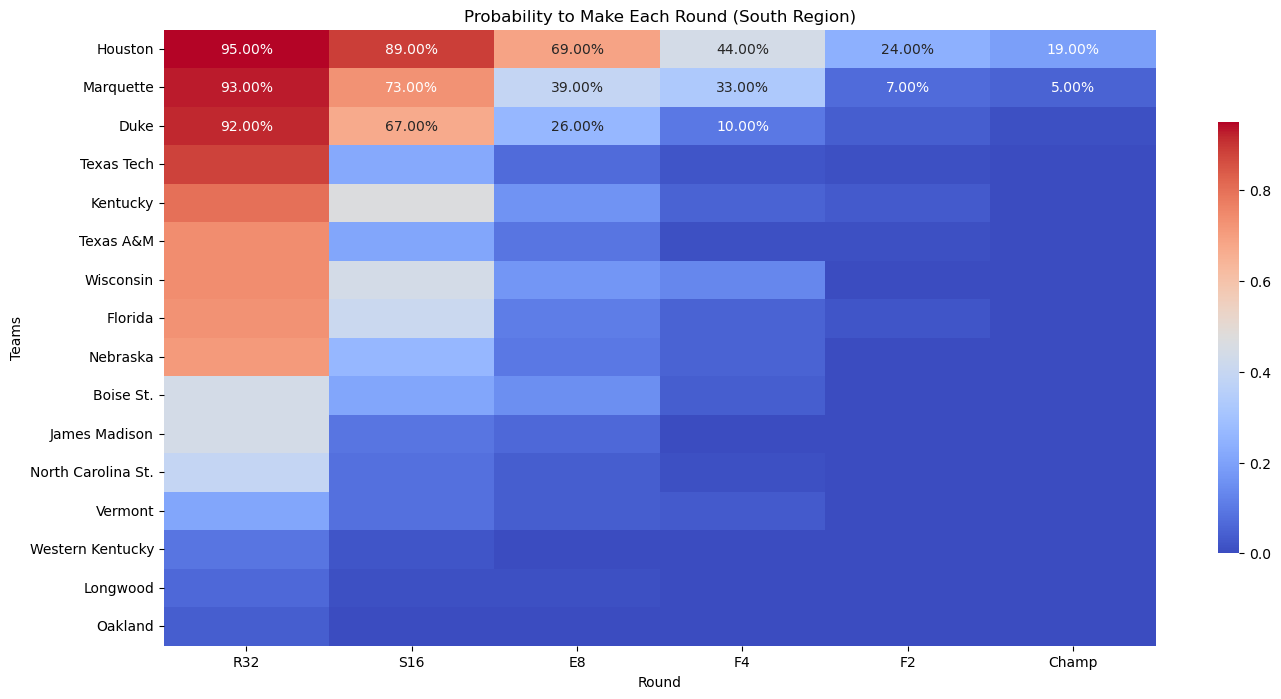

In [77]:
# Plotting heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(df_South, annot=True, cmap='coolwarm', fmt=".2%", cbar_kws={"shrink": 0.7})  # Change cmap for different color palettes
plt.title('Probability to Make Each Round (South Region)')
plt.xlabel('Round')
plt.ylabel('Teams')
plt.show()

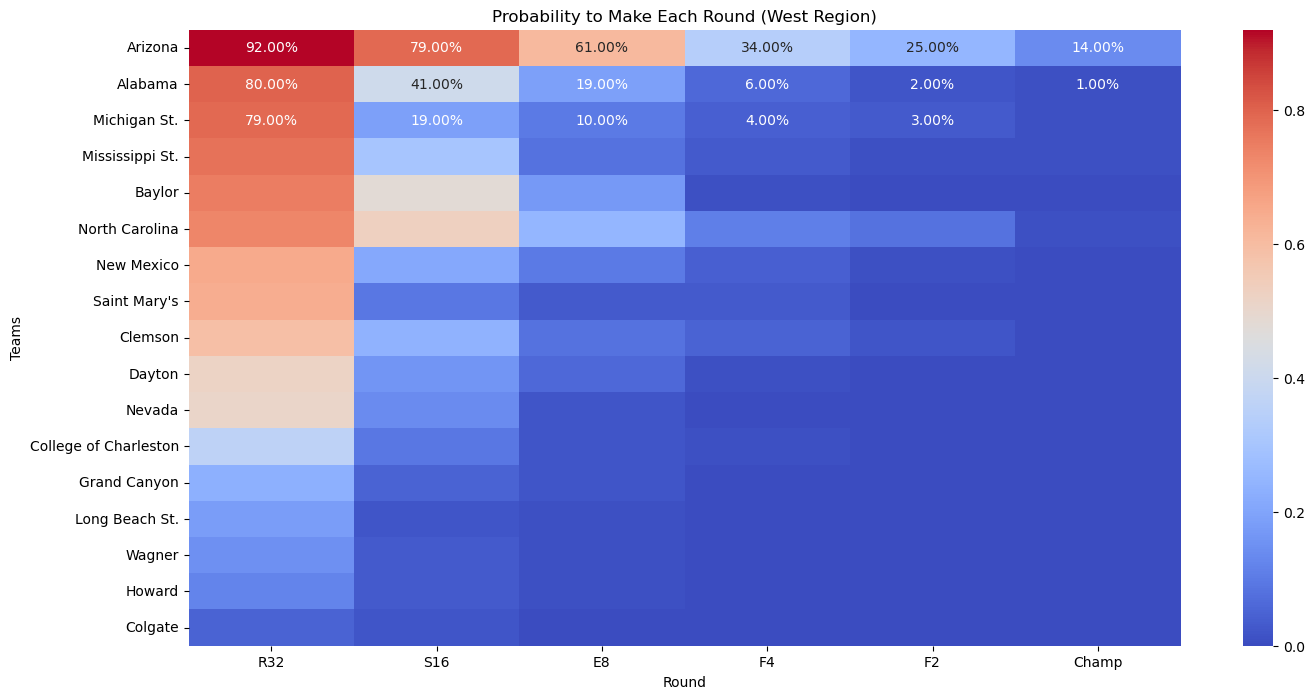

In [78]:
# Plotting heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(df_West, annot=True, cmap="coolwarm", fmt=".2%")  # Change cmap for different color palettes
plt.title('Probability to Make Each Round (West Region)')
plt.xlabel('Round')
plt.ylabel('Teams')
plt.show()